# Shafiqul Alam Khan

# EE 5323 Digital Image Processing

# Homework #7

# Due Date: 4/13/2023

2. Write Python code that performs a wavelet compression and does the following:
    - Read the Lena-colored image.
    - Apply the wavelet down to a 3-level decomposition to the image.
    - Restore the image from the compression.
    - Plot the original and compressed images side-by-side.
    - Plot the histograms of the original and compressed images side-by-side.
    - Print the file sizes of the original, compressed, and restored images.

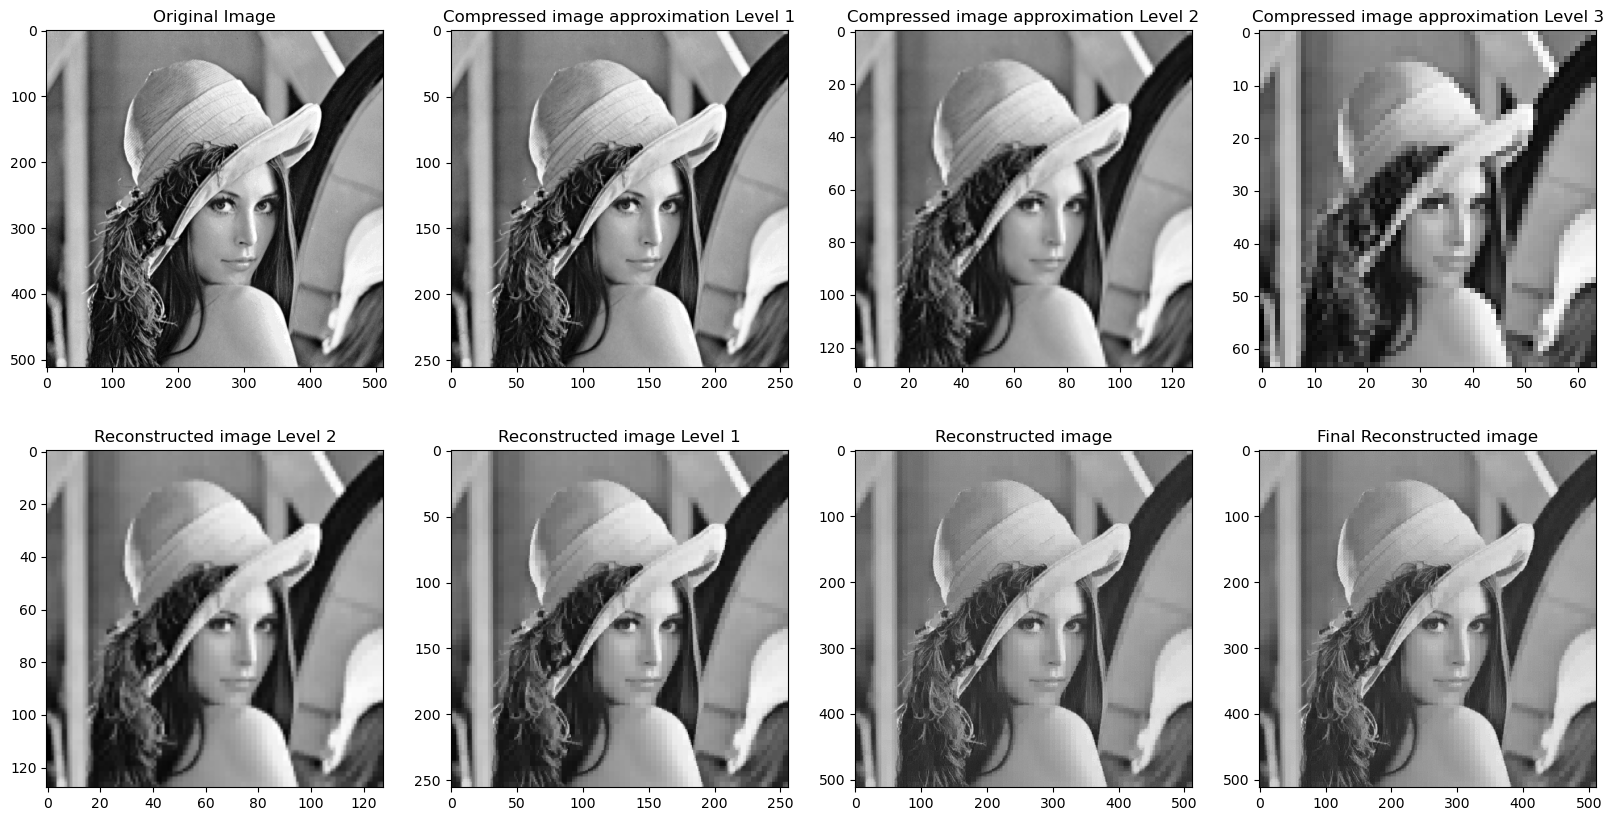

Original size: 475515 bytes
Compressed level 1 size: 28642 bytes
Compressed level 2 size: 3353 bytes
Compressed level 3 size: 182 bytes
Reconstructed level 2 size: 2594 bytes
Reconstructed level 1 size: 19774 bytes
Reconstructed final image size: 163382 bytes


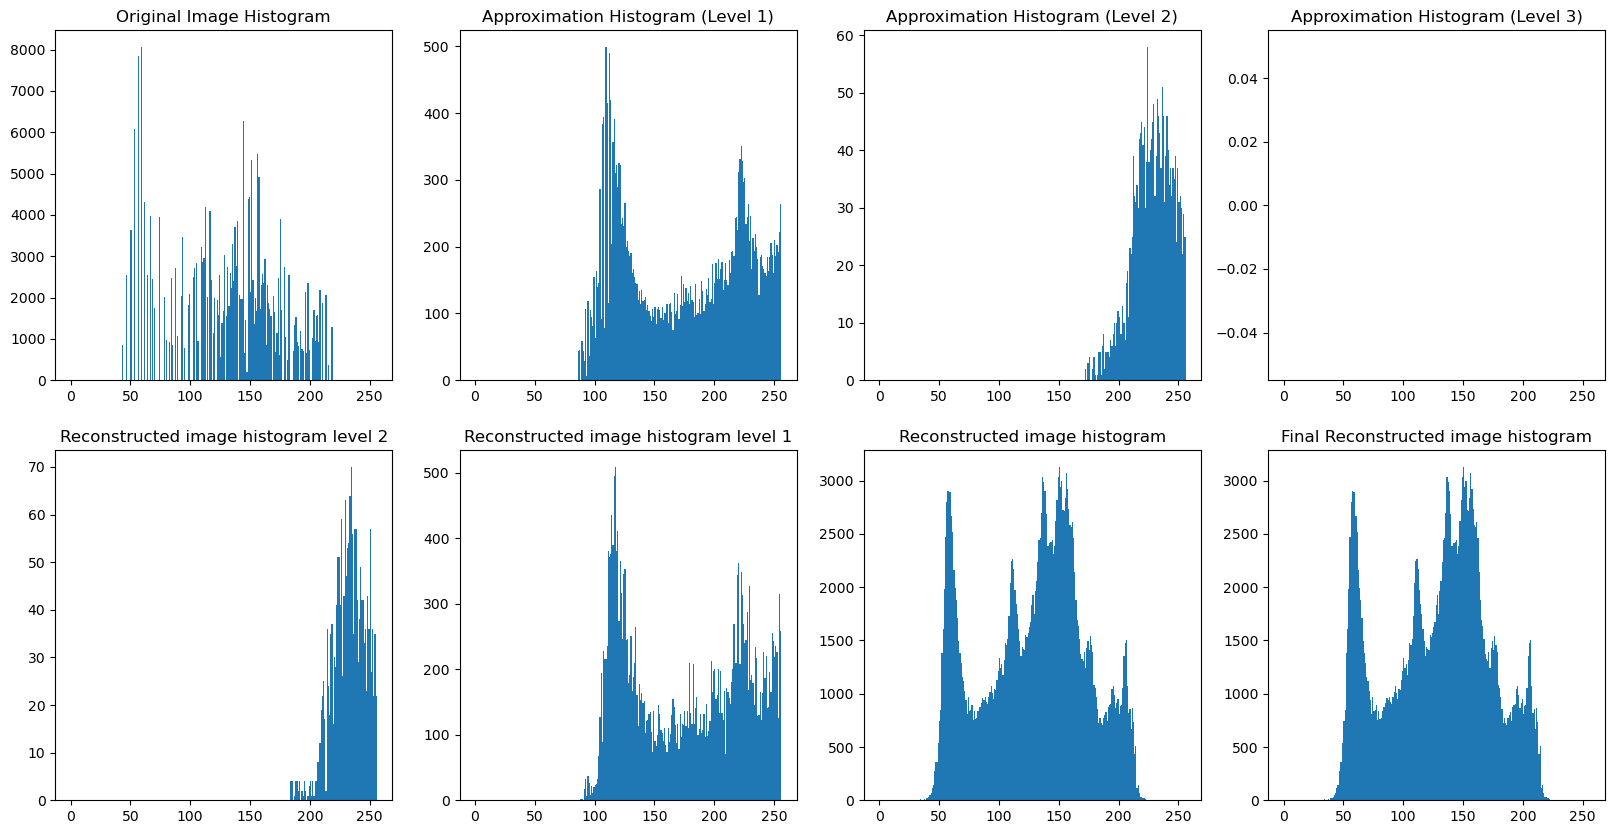

In [1]:
# Importing libreries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import pywt

# Reading lena image
lena = cv2.imread('lena_color.png', cv2.IMREAD_GRAYSCALE)

# Apply the wavelet down to a 3-level decomposition to the image.

# Perform one-level Haar wavelet transform
coeffs_level1 = pywt.dwt2(lena, 'haar')
cA1, (cH1, cV1, cD1) = coeffs_level1

# Perform two-level Haar wavelet transform
coeffs_level2 = pywt.dwt2(cA1, 'haar')
cA2, (cH2, cV2, cD2) = coeffs_level2

# Perform three-level Haar wavelet transform
coeffs_level3 = pywt.dwt2(cA2, 'haar')
cA3, (cH3, cV3, cD3) = coeffs_level3

# Set a threshold value
thresh = 30

# Discard the high-frequency coefficients below the threshold
cH3 = pywt.threshold(cH3, thresh, mode='soft')
cV3 = pywt.threshold(cV3, thresh, mode='soft')
cD3 = pywt.threshold(cD3, thresh, mode='soft')

cH2 = pywt.threshold(cH2, thresh, mode='soft')
cV2 = pywt.threshold(cV2, thresh, mode='soft')
cD2 = pywt.threshold(cD2, thresh, mode='soft')

# Reconstruct the compressed image
coeffs = cA3, (cH3, cV3, cD3)
cA2_reconstructed = pywt.idwt2(coeffs, 'haar')

coeffs = cA2_reconstructed, (cH2, cV2, cD2)
cA1_reconstructed = pywt.idwt2(coeffs, 'haar')

coeffs = cA1_reconstructed, (cH1, cV1, cD1)
recon = pywt.idwt2(coeffs, 'haar')

# Display the images
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs[0, 0].imshow(lena, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 1].imshow(cA1, cmap='gray')
axs[0, 1].set_title('Compressed image approximation Level 1')
axs[0, 2].imshow(cA2, cmap='gray')
axs[0, 2].set_title('Compressed image approximation Level 2')
axs[0, 3].imshow(cA3, cmap='gray')
axs[0, 3].set_title('Compressed image approximation Level 3')
axs[1, 0].imshow(cA2_reconstructed, cmap='gray')
axs[1, 0].set_title('Reconstructed image Level 2')
axs[1, 1].imshow(cA1_reconstructed, cmap='gray')
axs[1, 1].set_title('Reconstructed image Level 1')
axs[1, 2].imshow(recon, cmap='gray')
axs[1, 2].set_title('Reconstructed image')
axs[1, 3].imshow(recon, cmap='gray')
axs[1, 3].set_title('Final Reconstructed image')
plt.show()

# Compute and display the histograms
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

axs[0, 0].hist(lena.ravel(), bins=256, range=(0, 256))
axs[0, 0].set_title('Original Image Histogram')

axs[0, 1].hist(cA1.ravel(), bins=256, range=(0, 256))
axs[0, 1].set_title('Approximation Histogram (Level 1)')

axs[0, 2].hist(cA2.ravel(), bins=256, range=(0, 256))
axs[0, 2].set_title('Approximation Histogram (Level 2)')

axs[0, 3].hist(cA3.ravel(), bins=256, range=(0, 256))
axs[0, 3].set_title('Approximation Histogram (Level 3)')

axs[1, 0].hist(cA2_reconstructed.ravel(), bins=256, range=(0, 256))
axs[1, 0].set_title('Reconstructed image histogram level 2')

axs[1, 1].hist(cA1_reconstructed.ravel(), bins=256, range=(0, 256))
axs[1, 1].set_title('Reconstructed image histogram level 1')

axs[1, 2].hist(recon.ravel(), bins=256, range=(0, 256))
axs[1, 2].set_title('Reconstructed image histogram')

axs[1, 3].hist(recon.ravel(), bins=256, range=(0, 256))
axs[1, 3].set_title('Final Reconstructed image histogram')

# Saving image files
cv2.imwrite('lena_compressed_level_1.png', cA1)
cv2.imwrite('lena_compressed_level_2.png', cA2)
cv2.imwrite('lena_compressed_level_3.png', cA3)
cv2.imwrite('lena_reconstructed_level_2.png', cA2_reconstructed)
cv2.imwrite('lena_reconstructed_level_1.png', cA1_reconstructed)
cv2.imwrite('lena_Final_reconstructed.png', recon)

# Print the file sizes.
original = os.path.getsize('lena_color.png')
compressed_level_1 = os.path.getsize('lena_compressed_level_1.png')
compressed_level_2 = os.path.getsize('lena_compressed_level_2.png')
compressed_level_3 = os.path.getsize('lena_compressed_level_3.png')
reconstructed_level_2 = os.path.getsize('lena_reconstructed_level_2.png')
reconstructed_level_1 = os.path.getsize('lena_reconstructed_level_1.png')
reconstructed_final = os.path.getsize('lena_Final_reconstructed.png')

print(f'Original size: {original} bytes')
print(f'Compressed level 1 size: {compressed_level_1} bytes')
print(f'Compressed level 2 size: {compressed_level_2} bytes')
print(f'Compressed level 3 size: {compressed_level_3} bytes')
print(f'Reconstructed level 2 size: {reconstructed_level_2} bytes')
print(f'Reconstructed level 1 size: {reconstructed_level_1} bytes')
print(f'Reconstructed final image size: {reconstructed_final} bytes')